In [79]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import simps


# Lectura de datos desde el excel 

In [80]:
data=pd.read_excel('Pregunta2.xlsx',sheet_name='Integrate')

In [81]:
y=data.iloc[:,0]
f_y=data.iloc[:,1]
y=y.to_numpy()
f_y=f_y.to_numpy()

In [39]:
simps(y=f_y,x=y)

1.4904615691595517

# Resolucion con Python desde 0

In [83]:
#Datos
V_prima=6.53*10**-4
L_prima=4.2*10**-2

yb=0.2
ya=0.02
xa=0
A=0.0929
Yb=yb/(1-yb)
Ya=ya/(1-ya)
Xa=0

Mr_SO2=64
Mr_H2O=18
Mr_air=29

In [84]:
#calcular xb
Xb=V_prima*(Yb-Ya)/L_prima
xb=Xb/(1+Xb)

In [85]:
def y_star (x):
    #function que retorna y* con input de x
    return -690392*x**3 + 5412.5*x**2 + 18.406*x

def LOA(x):
    #funcion que retorna y para x
    X=x/(1-x)
    Y=Ya+L_prima/V_prima*(X-Xa)
    y=Y/(1+Y)
    return y

def kya(Gx,Gy):
    return 0.0594*Gy**0.7*Gx**0.25
def kxa (Gx):
    return 0.152*Gx**0.82
def pendiente (x):
    return -690392*3*x**2 + 5412.5*2*x + 18.406

def Kya(x,y):
    #funcion que retorna Ky'a a partir de x e y, calcula V, L, Gx, Gy, kx'a,ky'a y la pendiente
    V=V_prima/(1-y)
    L=L_prima/(1-x)
    PMx=Mr_SO2*x+(1-x)*Mr_H2O
    PMy=Mr_SO2*y+(1-y)*Mr_air
    Gy=V/A*PMy
    Gx=L/A*PMx
    
    coef_y=kya(Gx,Gy)
    coef_x=kxa(Gx)
    m=pendiente(x)

    return (1/coef_y+m/coef_x)**-1

def y_lm(y,y_star):
    return ((1-y_star)-(1-y))/np.log((1-y_star)/(1-y))

In [86]:
x_points=np.linspace(xa,xb,100)
y_star_points=y_star(x_points)
y_points=LOA(x_points)

In [87]:
f_y=V_prima/A/(Kya(x_points,y_points)/y_lm(y_points,y_star_points)*(1-y_points)**2*(y_points-y_star_points))

In [88]:
Z=simps(y=f_y,x=y_points)
print("El valor de Z es: ", np.round(Z,5))

El valor de Z es:  1.49048


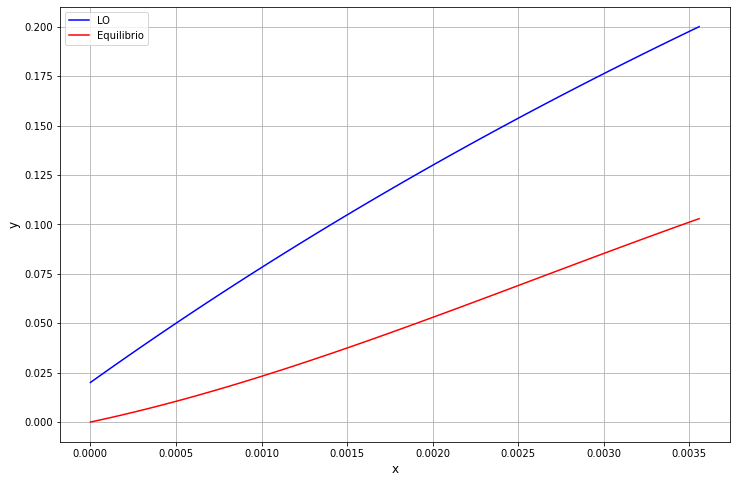

In [93]:
plt.figure(figsize=(12,8))
plt.plot(x_points,y_points,"b")
plt.plot(x_points,y_star_points,"r")
plt.grid()
plt.xlabel("x",fontsize=12)
plt.ylabel("y",fontsize=12)
plt.legend(("LO","Equilibrio"),loc="best")
plt.savefig("P2_LO.png")
plt.show()

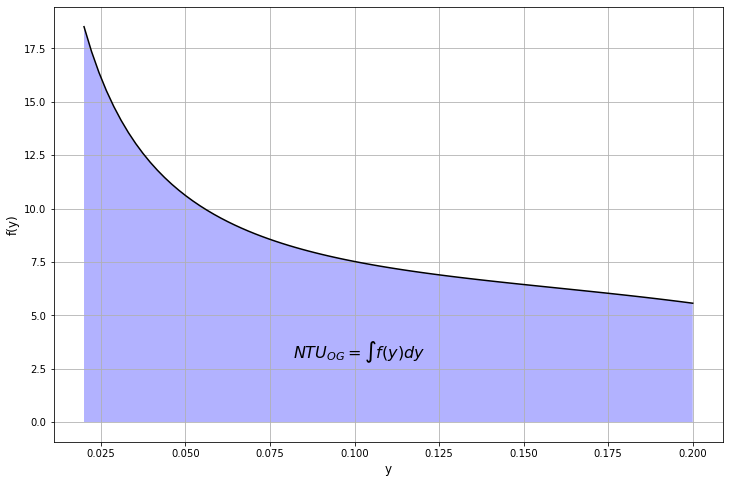

In [100]:
plt.figure(figsize=(12,8))
plt.plot(y_points,f_y,"k")
plt.grid()
plt.xlabel("y",fontsize=12)
plt.ylabel("f(y)",fontsize=12)
plt.fill_between(y_points,f_y,0,facecolor="blue", alpha=0.3)         
plt.annotate(r'$NTU_{OG}=\int f(y)dy$',xy=((yb-ya)/2.2, 3),fontsize=16)
plt.savefig("P2_Z.png")
plt.show()

## Pregunta b

In [53]:
#TOPE Columna
Va=V_prima/(1-ya)
La=L_prima/(1-xa)
PMx_a=Mr_SO2*xa+(1-xa)*Mr_H2O
PMy_a=Mr_SO2*ya+(1-ya)*Mr_air
Gy_a=Va/A*PMy_a
Gx_a=La/A*PMx_a
coef_y_a=kya(Gx_a,Gy_a)
coef_x_a=kxa(Gx_a)

In [62]:
Vb=V_prima/(1-yb)
Lb=L_prima/(1-xb)
PMx_b=Mr_SO2*xb+(1-xb)*Mr_H2O
PMy_b=Mr_SO2*yb+(1-yb)*Mr_air
Gy_b=Vb/A*PMy_b
Gx_b=Lb/A*PMx_b
coef_y_b=kya(Gx_b,Gy_b)
coef_x_b=kxa(Gx_b)


In [77]:
V_bar=(Va+Vb)/2
L_bar=(La+Lb)/2
ky_a_bar=(coef_y_a+coef_y_b)/2
kx_a_bar=(coef_x_a+coef_x_b)/2
m=(y_star(xa)-y_star(xb))/(xa-xb)
Kya_bar=(1/ky_a_bar+m/kx_a_bar)**-1

0.039475192782343585 0.8525308330049584 0.01687517286595414


In [75]:
H_oy=V_bar/A/Kya_bar
N_oy=simps(1/(y_points-y_star_points),y_points)
print("El valor de HTU es: ", np.round(H_oy,3), ". El valor de NTU es: ", np.round(N_oy,3),". La altura de la columna es: ", np.round(N_oy*H_oy,3))

El valor de HTU es:  0.473 . El valor de NTU es:  3.223 . La altura de la columna es:  1.524


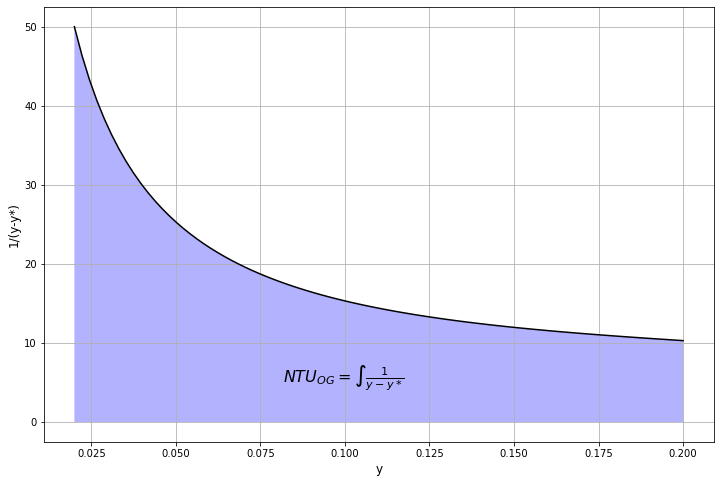

In [97]:
plt.figure(figsize=(12,8))
plt.plot(y_points,1/(y_points-y_star_points),"k")
plt.grid()
plt.xlabel("y",fontsize=12)
plt.ylabel("1/(y-y*)",fontsize=12)
plt.fill_between(y_points,1/(y_points-y_star_points),0,facecolor="blue", alpha=0.3)         
plt.annotate(r'$NTU_{OG}=\int\frac{1}{y-y*}$',xy=((yb-ya)/2.2, 5),fontsize=16)
plt.savefig("P2_b_Z.png")
plt.show()